## Airbnb Marchine Learning


In [1]:
import pandas as pd
import json 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest

In [2]:
ruta = "/workspaces/aliasys-procesamiento-de-datos/data/raw/AB_NYC_2019.csv"

# Cargar los datos desde el enlace
total_data = pd.read_csv(ruta)

# Mostrar primeras filas
total_data.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# Mostrar la forma del DataFrame
total_data.shape

(48895, 16)

In [4]:
# Mostrar información del DataFrame
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
# Eliminar las columnas que no son necesarias
total_data.drop(["id", "name", "host_name", "last_review", "neighbourhood_group", "neighbourhood"], axis=1, inplace=True)

In [6]:
# Eliminar duplicados innecesarios
total_data.drop_duplicates(inplace=True)

## Observaciones:
- Cargamos el Dataset
- Nos fijamos que 'id', 'name', 'host_name', 'last_review', 'reviews_per_month y 'availability_356' no nos muestran una informacion necesaria por lo que procedemos a eliminarla.
- Procedemos tambien a elimiar los duplicados.

# Analisis univariado de las variables numéricas

In [7]:
# Eliminar filas con valores nulos
total_data.dropna(inplace=True)
# Mostrar estadísticas descriptivas
total_data.describe()


,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.884300e+04,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000
mean,6.423915e+07,40.728134,-73.951148,142.317947,5.868059,29.297557,1.373221,5.164457,114.882888
std,7.588847e+07,0.054990,0.046695,196.945624,17.384784,48.186374,1.680442,26.295665,129.543636
min,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,7.033824e+06,40.688640,-73.982470,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,2.837193e+07,40.721710,-73.954800,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,1.018465e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


- Analizamos las variables categoricas:

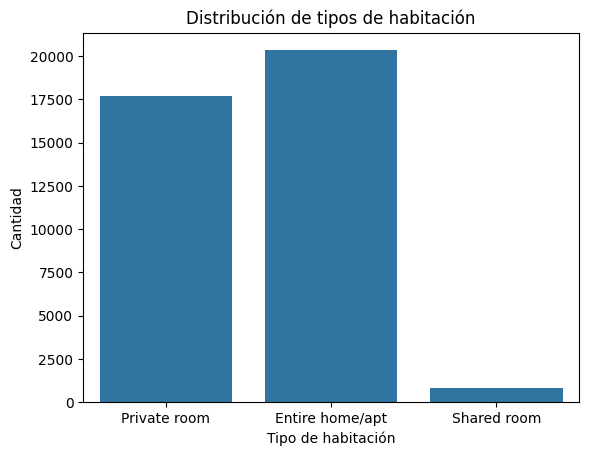

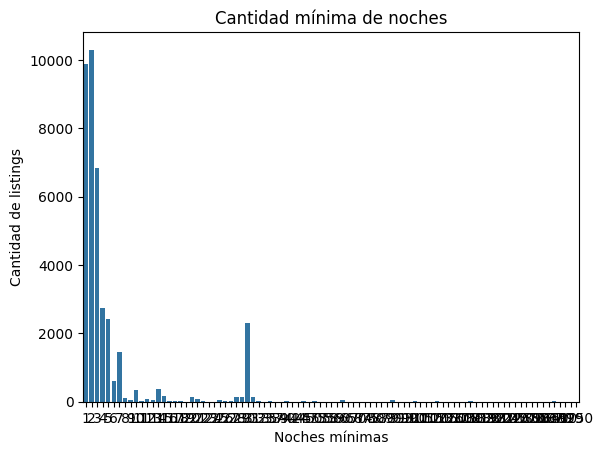

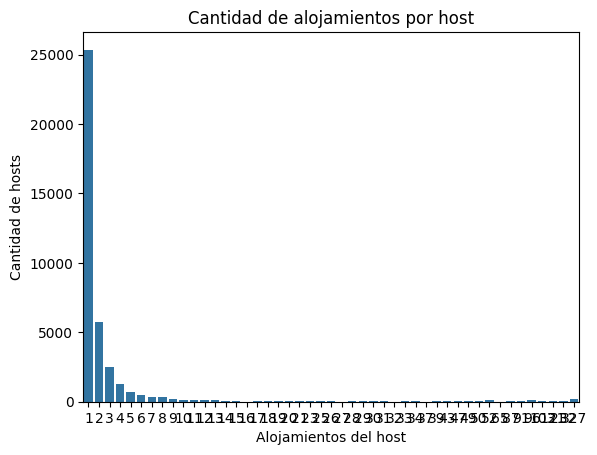

In [8]:
sns.countplot(x='room_type', data = total_data)
plt.title("Distribución de tipos de habitación")
plt.xlabel("Tipo de habitación")
plt.ylabel("Cantidad")
plt.show()


sns.countplot(x='minimum_nights', data = total_data)
plt.title("Cantidad mínima de noches")
plt.xlabel("Noches mínimas")
plt.ylabel("Cantidad de listings")
plt.show()


sns.countplot(x='calculated_host_listings_count', data = total_data)
plt.title("Cantidad de alojamientos por host")
plt.xlabel("Alojamientos del host")
plt.ylabel("Cantidad de hosts")
plt.show()

## Observaciones:
- La mayoría de los anuncios son para departamentos completos (Entire home/apt), seguidos por habitaciones privadas. Esto indica que los usuarios prefieren privacidad y comodidad.
- La mayoría de los alojamientos permiten estancias cortas (1 o 2 noches), aunque hay algunos con requisitos más largos, destinados a estancias prolongadas o alquileres temporales.
- La mayoría de los anfitriones tienen solo un listado, indicando que la mayoría son particulares que alquilan su propiedad.

### Analizamos las varibles numericas

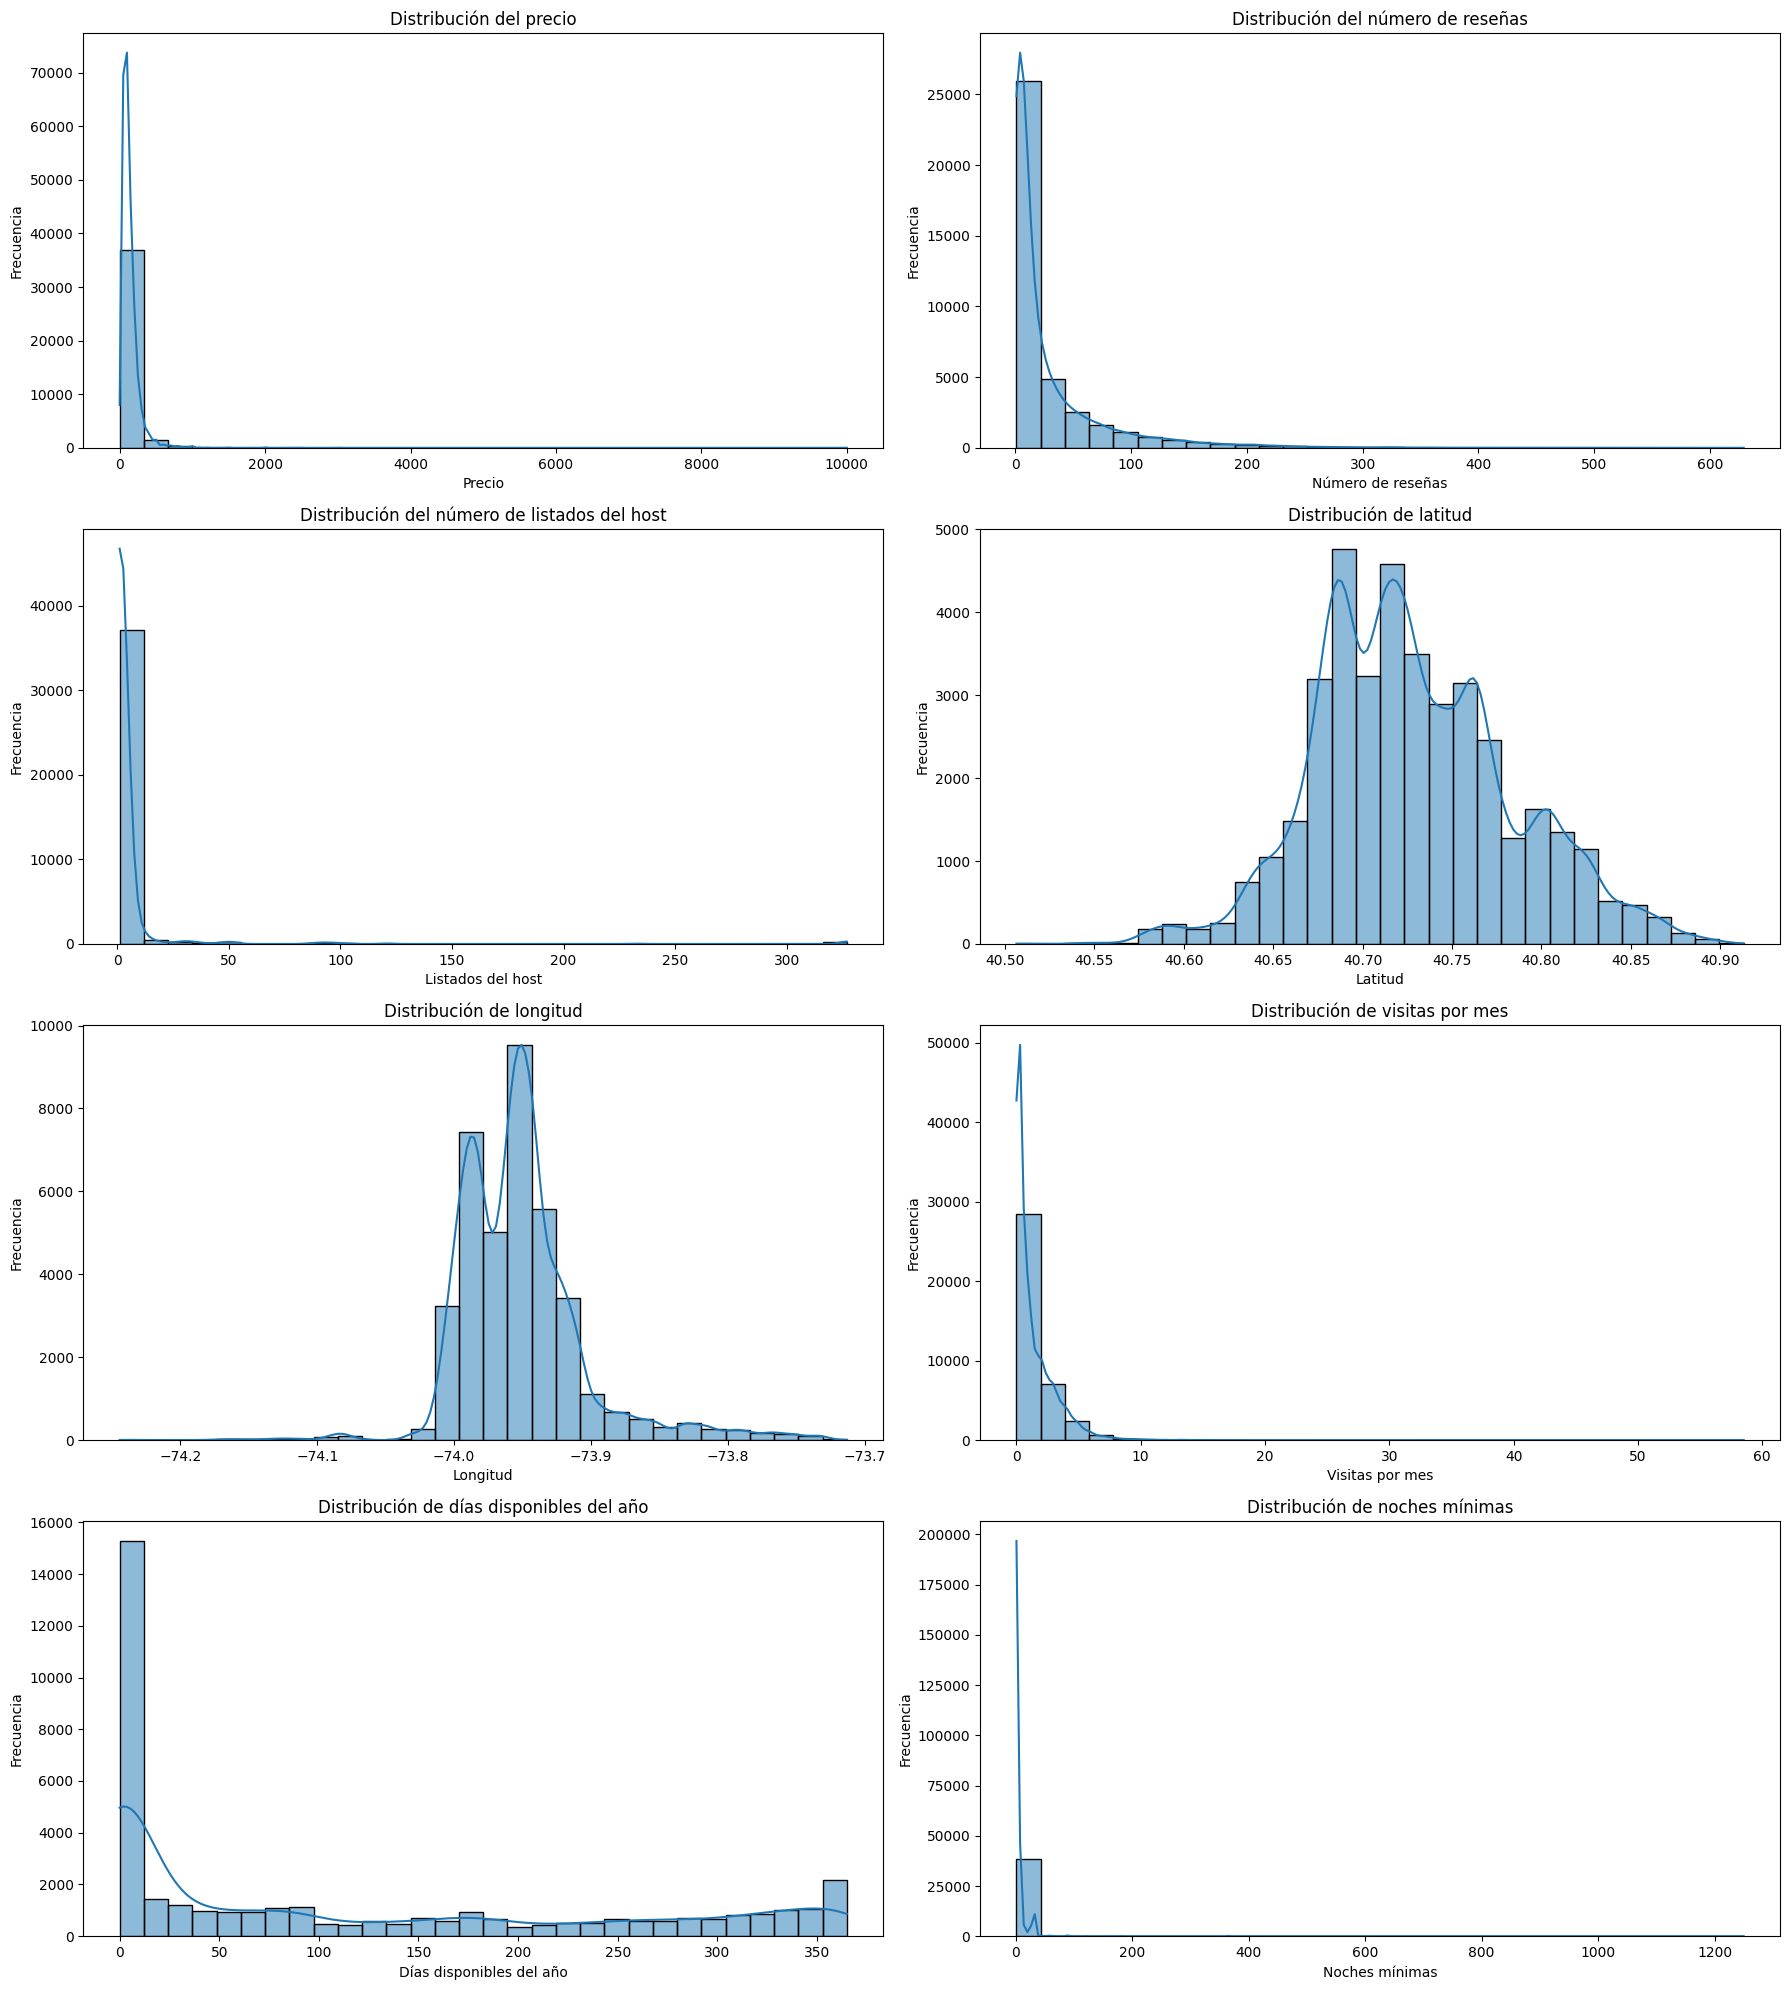

In [9]:
# Creamos un subplot con 4 filas y 2 columnas
fig, axes = plt.subplots(4, 2, figsize=(18, 20))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Histograma: Distribución del precio
sns.histplot(data=total_data, x="price", bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribución del precio")
axes[0, 0].set_xlabel("Precio")
axes[0, 0].set_ylabel("Frecuencia")

# Histograma: Número de reseñas
sns.histplot(data=total_data, x="number_of_reviews", bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Distribución del número de reseñas")
axes[0, 1].set_xlabel("Número de reseñas")
axes[0, 1].set_ylabel("Frecuencia")

# Histograma: Listados del host
sns.histplot(data=total_data, x="calculated_host_listings_count", bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Distribución del número de listados del host")
axes[1, 0].set_xlabel("Listados del host")
axes[1, 0].set_ylabel("Frecuencia")

# Histograma: latitud
sns.histplot(data=total_data, x="latitude", bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Distribución de latitud")
axes[1, 1].set_xlabel("Latitud")
axes[1, 1].set_ylabel("Frecuencia")

# Histograma: longitud
sns.histplot(data=total_data, x="longitude", bins=30, kde=True, ax=axes[2, 0])
axes[2, 0].set_title("Distribución de longitud")
axes[2, 0].set_xlabel("Longitud")
axes[2, 0].set_ylabel("Frecuencia")

# Histograma: visitas por mes
sns.histplot(data=total_data, x="reviews_per_month", bins=30, kde=True, ax=axes[2, 1])
axes[2, 1].set_title("Distribución de visitas por mes")
axes[2, 1].set_xlabel("Visitas por mes")
axes[2, 1].set_ylabel("Frecuencia")

# Histograma: días disponibles
sns.histplot(data=total_data, x="availability_365", bins=30, kde=True, ax=axes[3, 0])
axes[3, 0].set_title("Distribución de días disponibles del año")
axes[3, 0].set_xlabel("Días disponibles del año")
axes[3, 0].set_ylabel("Frecuencia")

# Histograma: noches mínimas
sns.histplot(data=total_data, x="minimum_nights", bins=30, kde=True, ax=axes[3, 1])
axes[3, 1].set_title("Distribución de noches mínimas")
axes[3, 1].set_xlabel("Noches mínimas")
axes[3, 1].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()



# Analisis de la grafica :
- En la grafica del precio: Hay un pico claro en precios bajos (entre 0 y 200), y una larga cola hacia la derecha (precios muy altos).
- En la grafica del número de reseñas (number_of_reviews): La mayoría de los alojamientos tiene pocas reseñas, y muy pocos tienen muchas.
- En la grafica de listados por host (calculated_host_listings_count): Predominan los hosts con solo 1 alojamiento; algunos tienen muchos más.
- En la grafica de latitud (latitude): Muestra la ubicación geográfica (norte-sur) de los alojamientos en NYC; no indica problemas, pero puede explorarse junto con longitude.
- En la grafica de longitud (longitude): Similar a latitud, es estable pero con un par de picos.
- En la grafica de visitas por mes (reviews_per_month): Muchos valores bajos o nulos. Pocos alojamientos reciben muchas reseñas mensualmente.
- En la grafica de disponibilidad anual (availability_365): Picos en 0 y 365. Muchos alojamientos están siempre disponibles o totalmente inactivos.
- En la grafica de noches mínimas (minimum_nights): Pico en valores bajos (1–3 noches), pero algunos valores extremos muy altos (decenas o cientos).


# Analisis entre categoricas y numericas

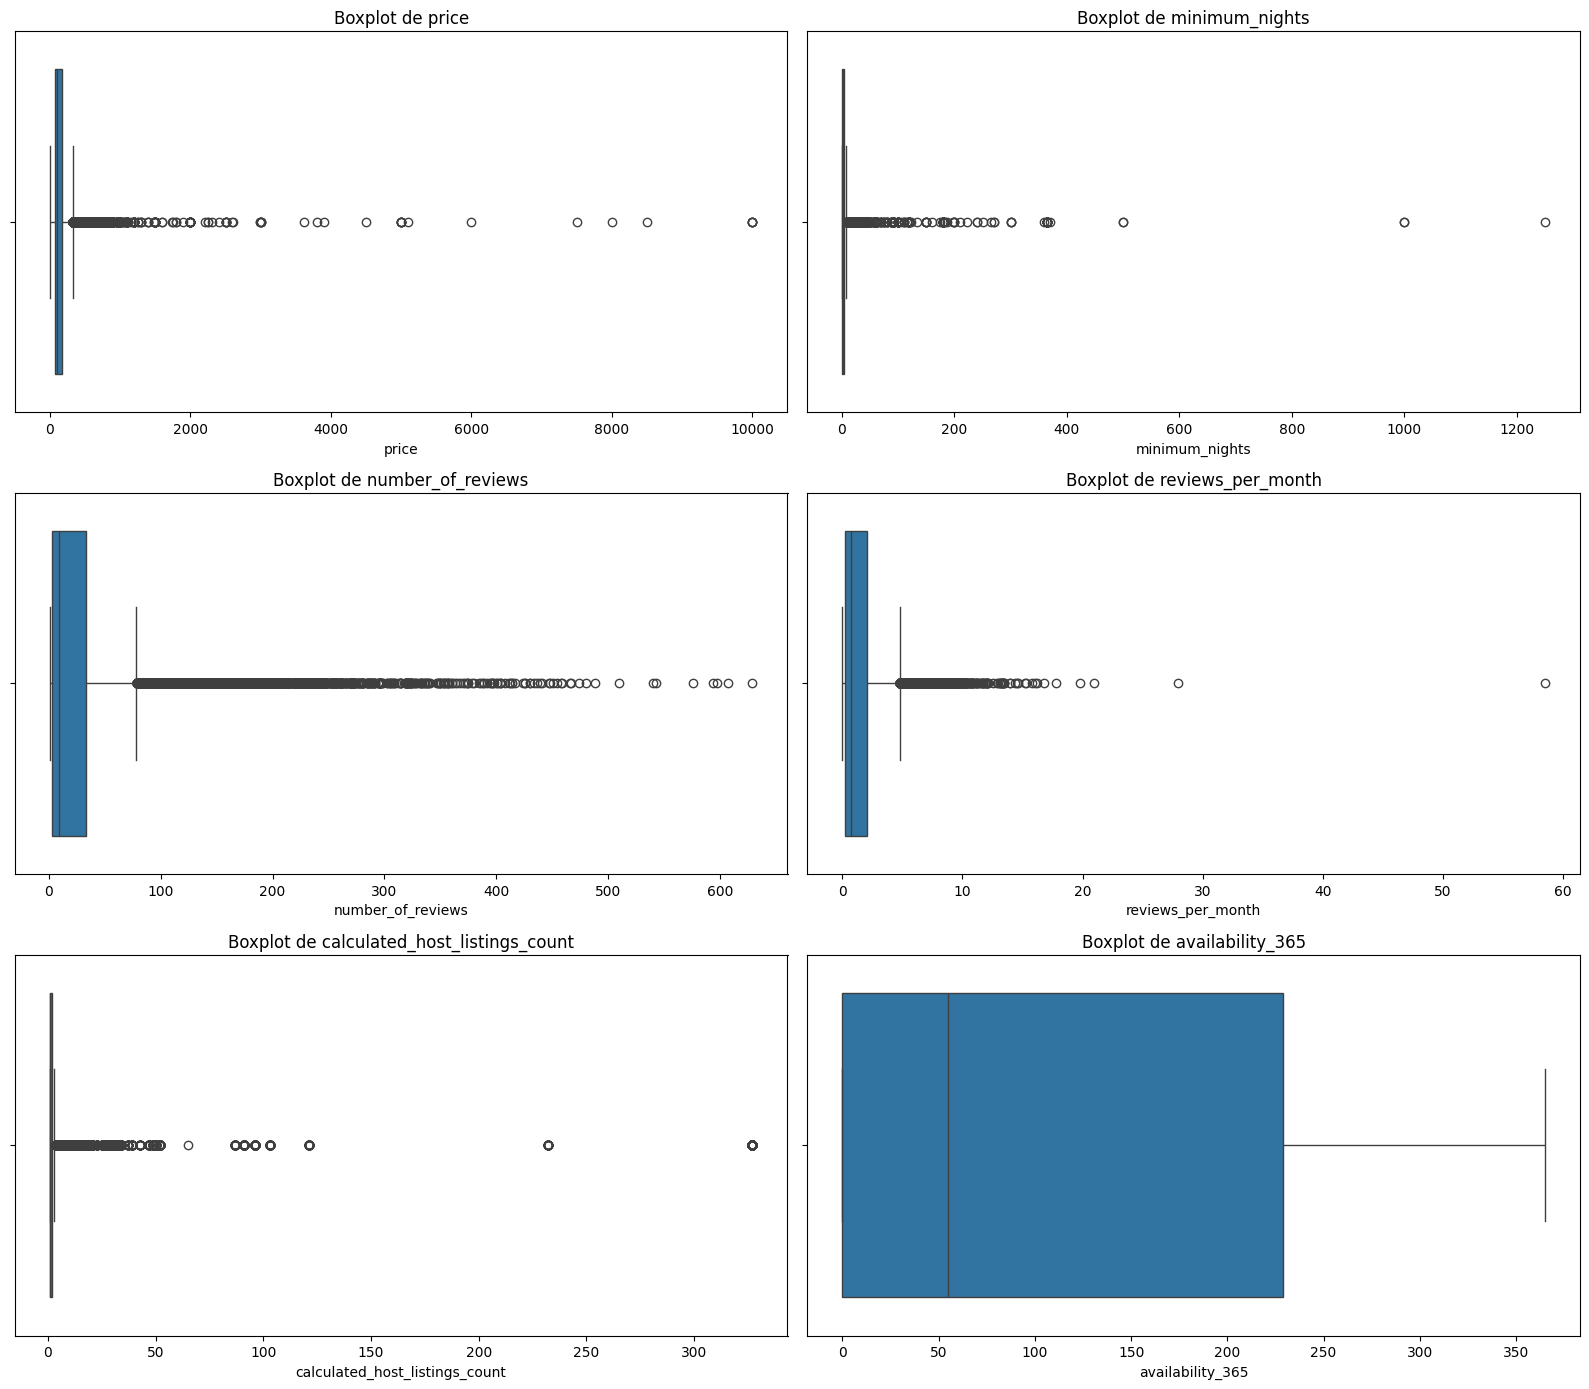

In [10]:
num_cols = ['price', 'minimum_nights', 'number_of_reviews',
            'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 14))
axes = axes.flatten()  # Aplanar para acceder como lista

for i, col in enumerate(num_cols):
    sns.boxplot(data=total_data, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

### Observamos:

- 'price': Vemos muchos puntos fuera del rango normal (alojamientos muy caros). Estos son outliers claros.

- 'minimum_nights': Algunos valores extremos (por ejemplo, 1000 noches) pueden ser errores o casos muy específicos.

- 'number_of_reviews': Algunos alojamientos tienen cientos o miles de reseñas, lo que no es común.

- 'reviews_per_month': La mayoría son bajos, pero hay outliers que muestran mucha actividad.

- 'calculated_host_listings_count': Algunos anfitriones tienen decenas o cientos de alojamientos.

- 'availability_365': Aunque el máximo esperado es 365, podrían aparecer puntos fuera si hay errores en los datos.

Procdemos a correlacionar los conceptos para entender mejor las graficas, tanto las categoricas como las numericas

In [11]:
# Crear un diccionario para mapear cada categoría a un número
mapping = {
    'Entire home/apt': 0,
    'Private room': 1,
    'Shared room': 2
}

# Reemplazar los valores de 'room_type' por números
total_data['room_type'] = total_data['room_type'].map(mapping)


- Pasamos 'room_type' a numerica para poder correlacionar bien las variables.

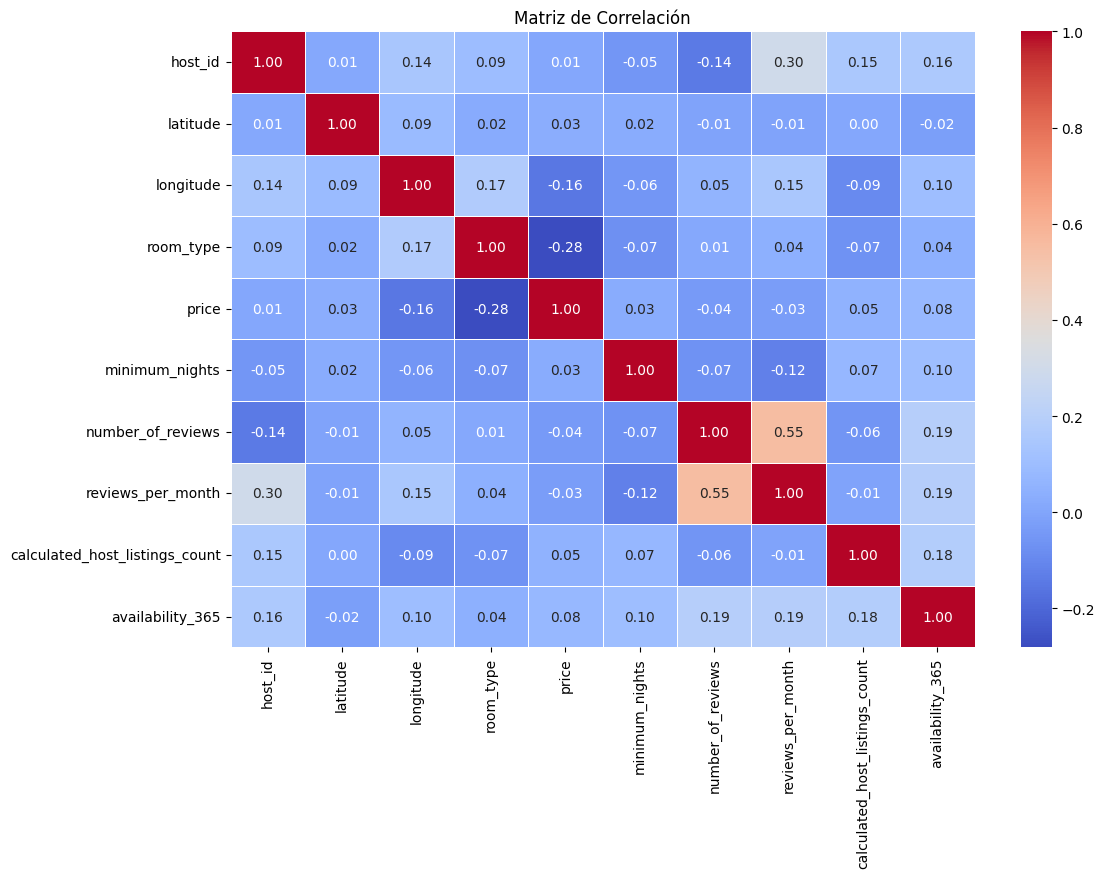

In [12]:
# Calcular la matriz de correlación
corr_matrix = total_data.corr(numeric_only=True)

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear el mapa de calor
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Título
plt.title("Matriz de Correlación")
plt.show()

-Eliminamos 'host_id', pues no es significativa.

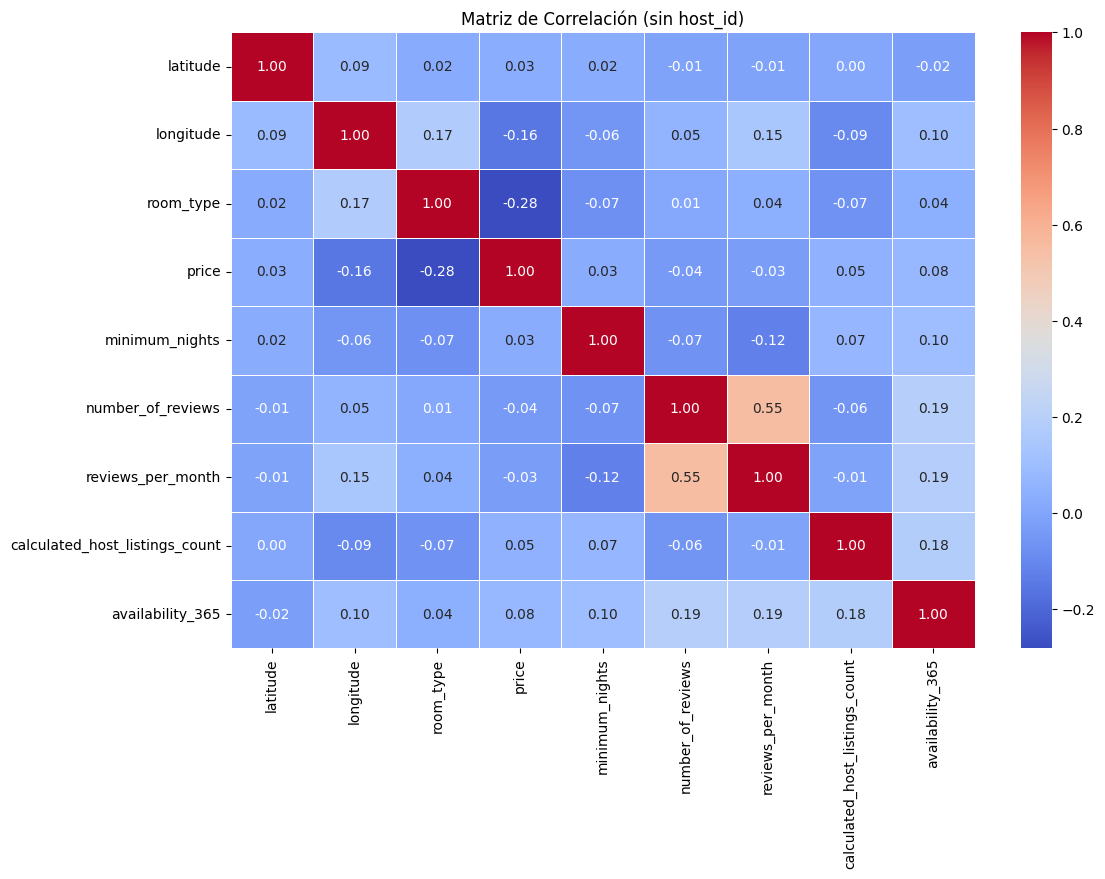

In [18]:
# Eliminar la columna 'host_id' para evitar sesgos en la matriz de correlación
total_data.drop(columns=['host_id'], inplace=True)

# Calcular la matriz de correlación
corr_matrix = total_data.corr(numeric_only=True)

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación (sin host_id)")
plt.show()

## Observamos:
- El tipo de habitación sí está relacionado con el precio. La correlación negativa indica que los precios bajan cuando el tipo de habitación pasa de "entire home" a "shared room".
- A más reseñas totales (number_of_reviews), más reseñas por mes (reviews_per_month). Las propiedades con alta demanda se mantienen activas con el tiempo.

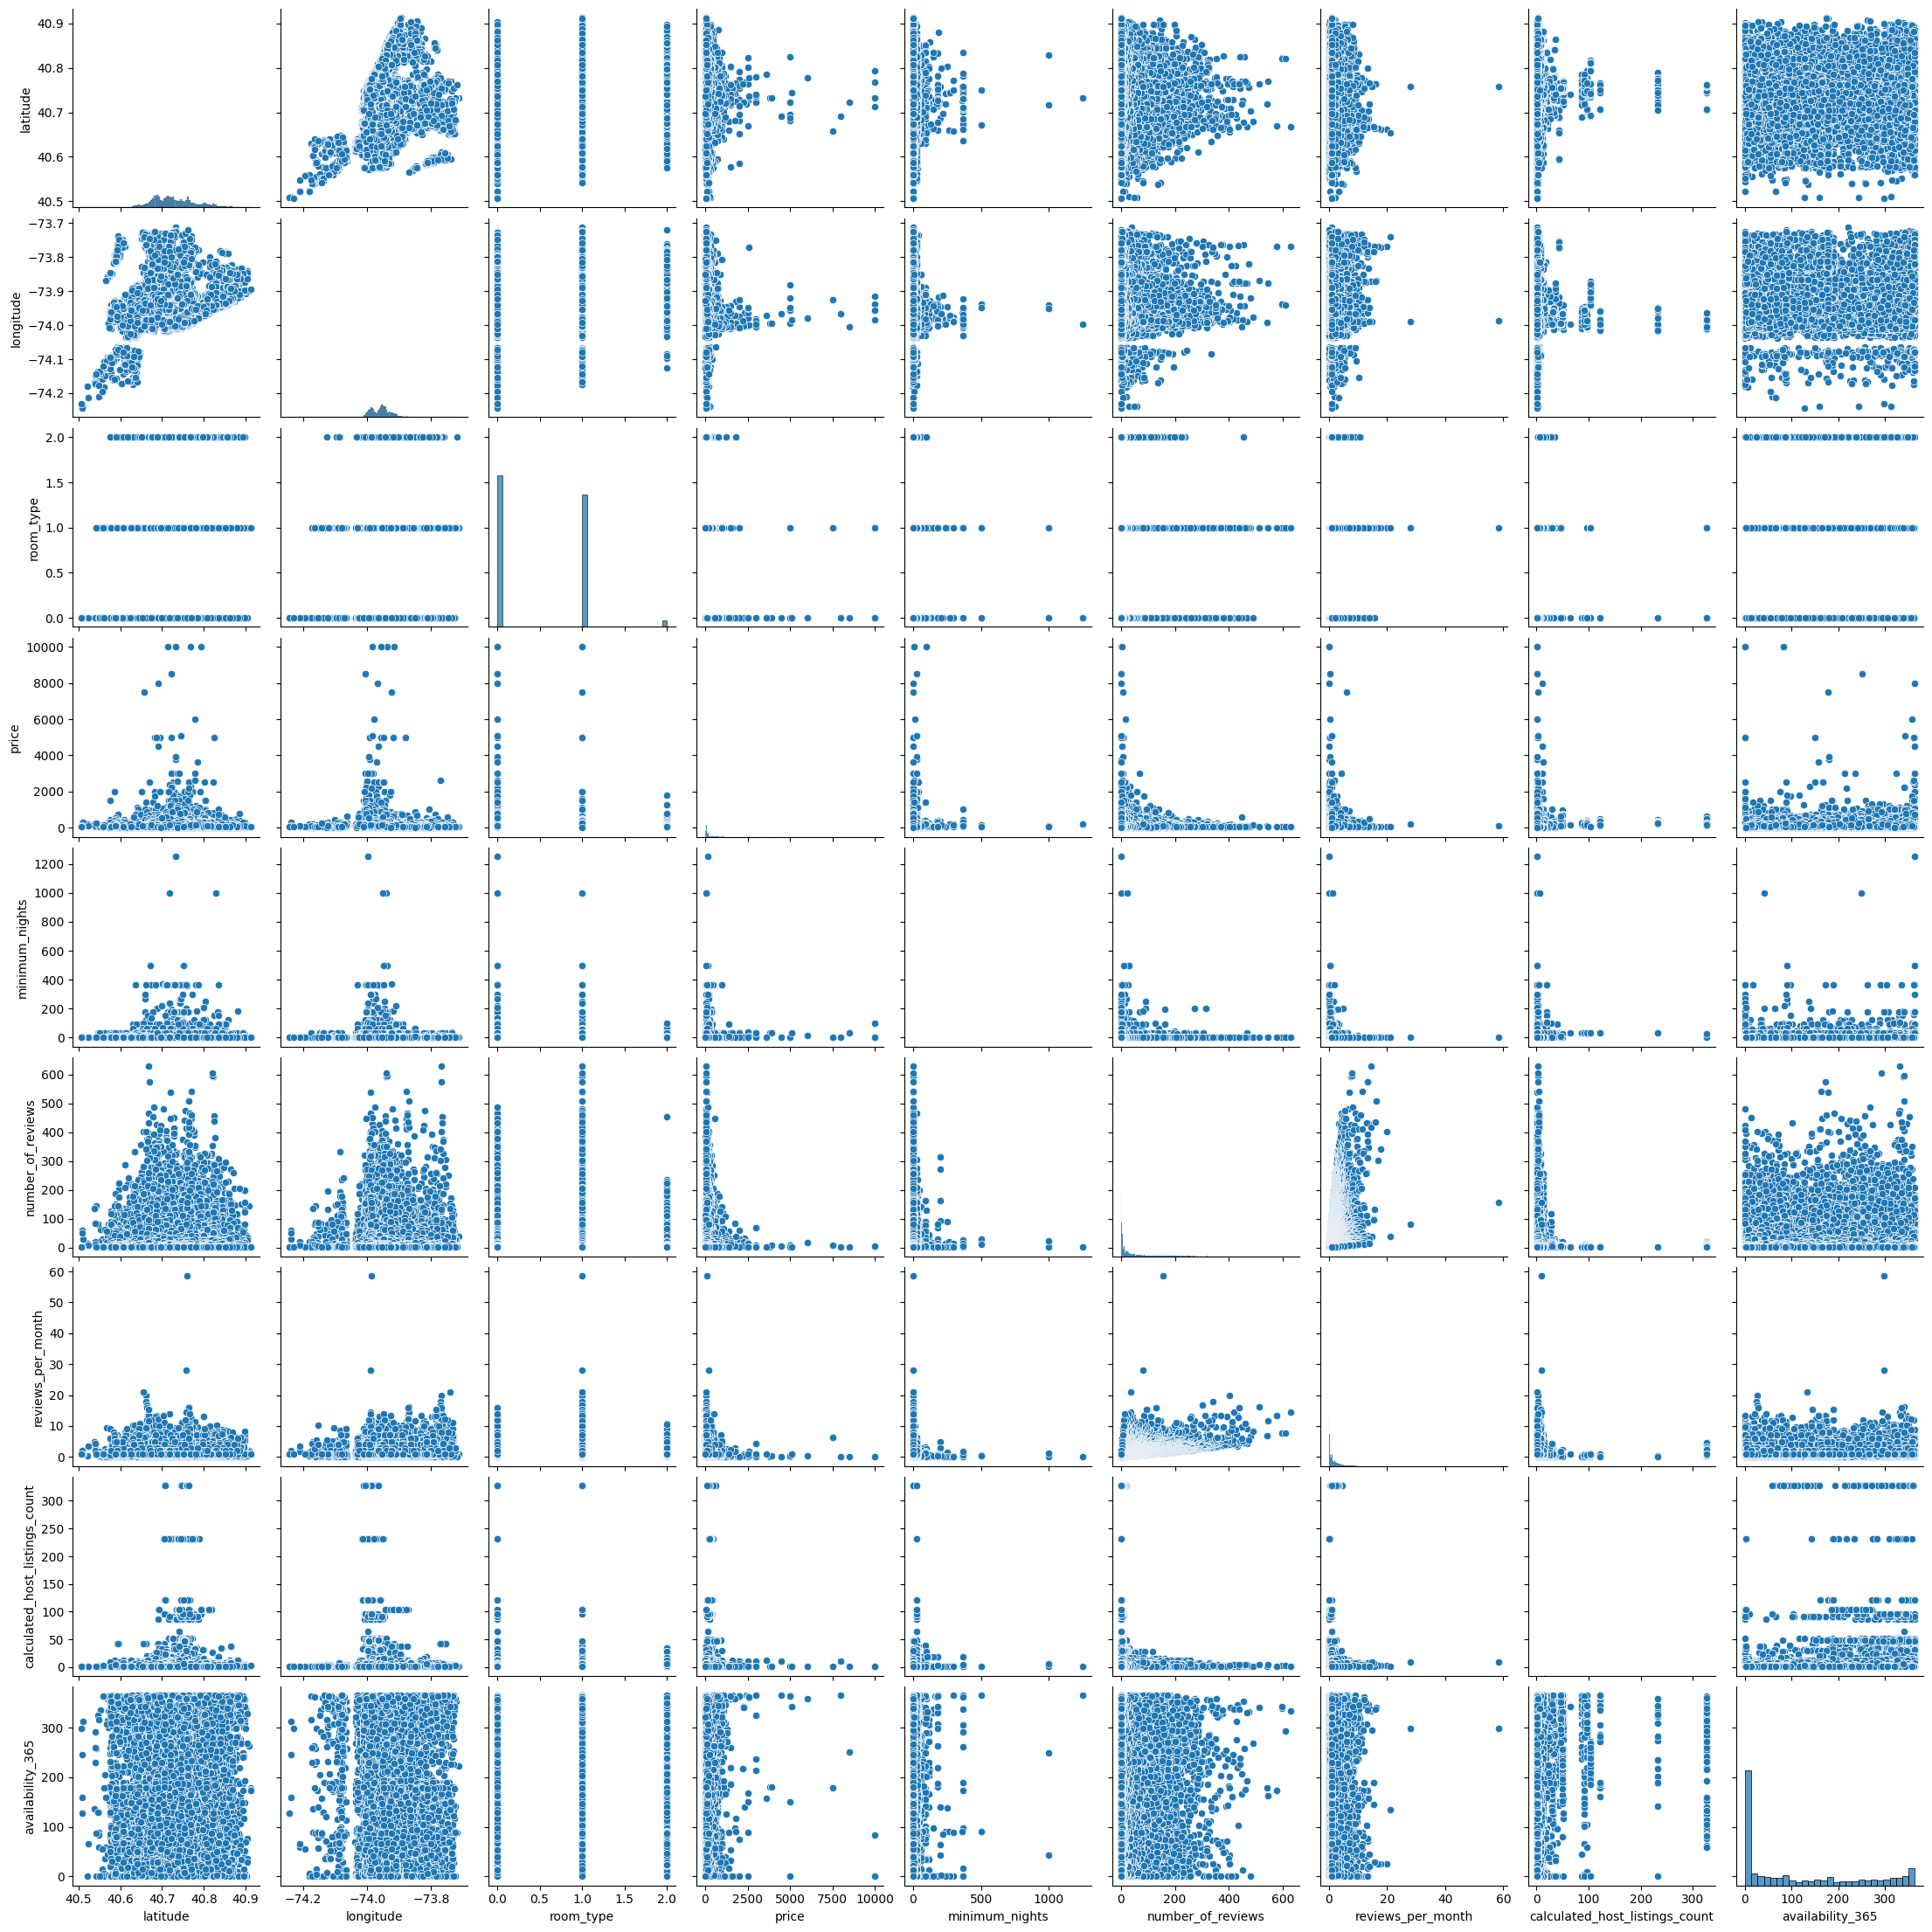

In [19]:
sns.pairplot(data=total_data)



## Paso 2

# Ingenieria de caracteristicas

In [20]:
# Buscamos si tenemos valores nulos en el DataFrame
total_data.isnull().sum().sort_values(ascending=False) / len(total_data)

latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

## Observaciones: 
- Transformamos los datos categoricos a numeriscos para poder trabajar con ellos.

# Analisis de outliers

In [21]:
total_data.describe()

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000
mean,40.728134,-73.951148,0.498339,142.317947,5.868059,29.297557,1.373221,5.164457,114.882888
std,0.054990,0.046695,0.541816,196.945624,17.384784,48.186374,1.680442,26.295665,129.543636
min,40.506410,-74.244420,0.000000,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,40.688640,-73.982470,0.000000,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,40.721710,-73.954800,0.000000,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,40.762990,-73.935020,1.000000,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,40.913060,-73.712990,2.000000,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


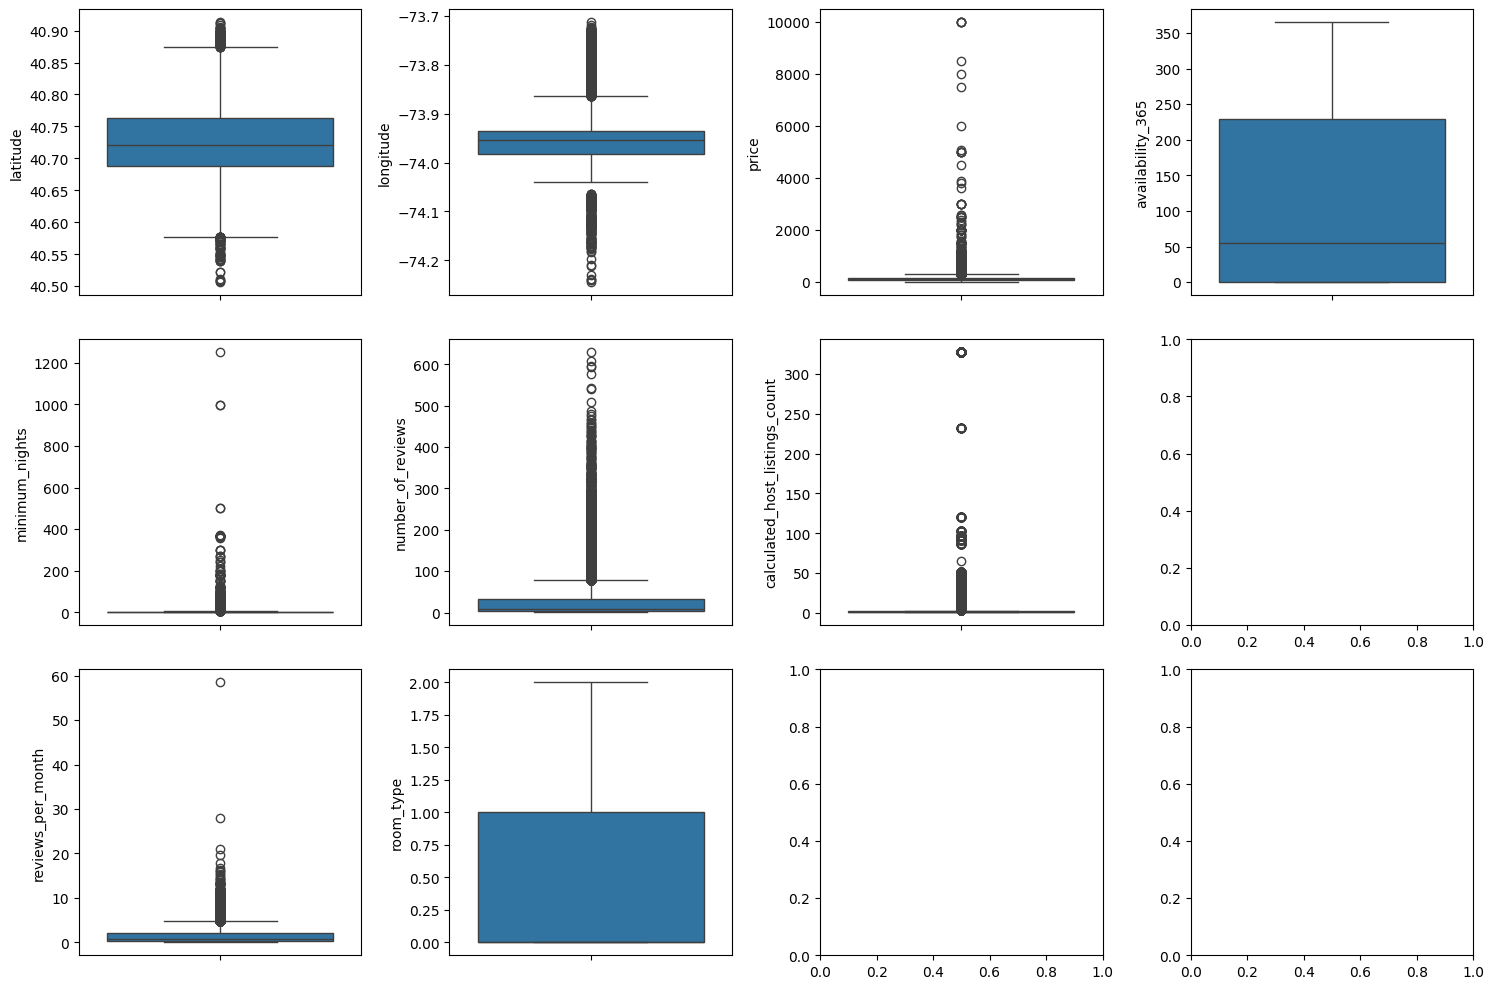

In [22]:
# Creamos subplots para detectar valores atípicos
fig, axis = plt.subplots(3, 4, figsize=(15, 10))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "latitude")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "longitude")
sns.boxplot(ax = axis[0, 2], data = total_data, y = "price")
sns.boxplot(ax = axis[1, 0], data = total_data, y = "minimum_nights")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "number_of_reviews")
sns.boxplot(ax = axis[1, 2], data = total_data, y = "calculated_host_listings_count")
sns.boxplot(ax = axis[2, 1], data = total_data, y = "room_type")
sns.boxplot(ax = axis[0, 3], data = total_data, y = "availability_365")
sns.boxplot(ax = axis[2, 0], data = total_data, y = "reviews_per_month")


plt.tight_layout()
plt.show()


## Observaciones: 
- Encontramos que 'price', 'latitude', longitude', 'minimimum_ninghts', 'number_of_reviews', 'calculated_host_listings_count' y 'reviews_per_month' tienen valores atipicos, los cuales tenmos que analizar.


- Valor atipico en ['price']

In [23]:

price_stats = total_data["price"].describe()

price_stats


count    38843.000000
mean       142.317947
std        196.945624
min          0.000000
25%         69.000000
50%        101.000000
75%        170.000000
max      10000.000000
Name: price, dtype: float64

In [24]:
iqr_price = price_stats["75%"] - price_stats["25%"]
upper_price = price_stats["75%"] + 1.5 * iqr_price
lower_price = price_stats["25%"] - 1.5 * iqr_price
f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_price, 2)} y {round(lower_price, 2)}, con un rango intercuartílico de {round(iqr_price, 2)}"

'Los límites superior e inferior para la búsqueda de outliers son 321.5 y -82.5, con un rango intercuartílico de 101.0'

### Hallazgos:
- Dado que los precios no pueden ser negativos, el límite inferior de -90.0 no tiene sentido práctico en este contexto.
- Por lo tanto, sólo los precios mayores a 334.0 deben considerarse como outliers.

> Esto indica que:

- La mayoría de los alojamientos están por debajo de los $334.
- Los precios significativamente mayores a eso podrían representar propiedades de lujo.

> En resumen: 
- No eliinimanos lo outliers pues parece que todo esta relacionados con ellos.

In [26]:
total_data[total_data["price"] > 300]
total_data


,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,1,149,1,9,0.21,6,365
1,40.75362,-73.98377,0,225,1,45,0.38,2,355
3,40.68514,-73.95976,0,89,1,270,4.64,1,194
4,40.79851,-73.94399,0,80,10,9,0.10,1,0
5,40.74767,-73.97500,0,200,3,74,0.59,1,129
...,...,...,...,...,...,...,...,...,...
48782,40.78099,-73.95366,1,129,1,1,1.00,1,147
48790,40.75104,-73.81459,1,45,1,1,1.00,6,339
48799,40.54179,-74.14275,1,235,1,1,1.00,1,87
48805,40.80787,-73.92400,0,100,1,2,2.00,1,40


> # Conclusion:
>
> Debido a que los precios estan por debajo de 334$, no lo eliminamos este outliers pues todos los datos estan relacionados.

- Valor atipico en ['minimum_nights']

In [27]:
# Hacemos lo mismo para "minimum_nights"
minimum_nights_stats = total_data["minimum_nights"].describe()
minimum_nights_stats

count    38843.000000
mean         5.868059
std         17.384784
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [28]:
iqr_minimum_nights = minimum_nights_stats["75%"] - minimum_nights_stats["25%"]
upper_minimum_nights = minimum_nights_stats["75%"] + 1.5 * iqr_minimum_nights
lower_minimum_nights = minimum_nights_stats["25%"] - 1.5 * iqr_minimum_nights
upper_minimum_nights
f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_minimum_nights, 2)} y {round(lower_minimum_nights, 2)}, con un rango intercuartílico de {round(iqr_minimum_nights, 2)}"

'Los límites superior e inferior para la búsqueda de outliers son 8.5 y -3.5, con un rango intercuartílico de 3.0'

In [29]:
total_data = total_data[total_data["minimum_nights"] <= upper_minimum_nights]
total_data

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,1,149,1,9,0.21,6,365
1,40.75362,-73.98377,0,225,1,45,0.38,2,355
3,40.68514,-73.95976,0,89,1,270,4.64,1,194
5,40.74767,-73.97500,0,200,3,74,0.59,1,129
7,40.76489,-73.98493,1,79,2,430,3.47,1,220
...,...,...,...,...,...,...,...,...,...
48782,40.78099,-73.95366,1,129,1,1,1.00,1,147
48790,40.75104,-73.81459,1,45,1,1,1.00,6,339
48799,40.54179,-74.14275,1,235,1,1,1.00,1,87
48805,40.80787,-73.92400,0,100,1,2,2.00,1,40


- Valor atipico en ['number_of_reviews']

In [30]:
# buscamos los outliers de "number_of_reviews"
number_of_reviews_stats = total_data["number_of_reviews"].describe()
number_of_reviews_stats

count    34379.000000
mean        31.394340
std         49.975139
min          1.000000
25%          3.000000
50%         11.000000
75%         37.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [31]:
iqr_number_of_reviews = number_of_reviews_stats["75%"] - number_of_reviews_stats["25%"]
upper_number_of_reviews = number_of_reviews_stats["75%"] + 1.5 * iqr_number_of_reviews
lower_number_of_reviews = number_of_reviews_stats["25%"] - 1.5 * iqr_number_of_reviews
upper_number_of_reviews

mensaje = (
    f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_number_of_reviews, 2)} y {round(lower_number_of_reviews, 2)}, "
    f"con un rango intercuartílico de {round(iqr_number_of_reviews, 2)}"
)
mensaje

'Los límites superior e inferior para la búsqueda de outliers son 88.0 y -48.0, con un rango intercuartílico de 34.0'

In [32]:
total_data = total_data[(total_data["number_of_reviews"]> 0) & (total_data["number_of_reviews"] < upper_number_of_reviews)]
total_data

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,1,149,1,9,0.21,6,365
1,40.75362,-73.98377,0,225,1,45,0.38,2,355
5,40.74767,-73.97500,0,200,3,74,0.59,1,129
10,40.80316,-73.96545,0,135,5,53,0.43,1,6
18,40.67592,-73.94694,0,99,3,53,4.44,1,21
...,...,...,...,...,...,...,...,...,...
48782,40.78099,-73.95366,1,129,1,1,1.00,1,147
48790,40.75104,-73.81459,1,45,1,1,1.00,6,339
48799,40.54179,-74.14275,1,235,1,1,1.00,1,87
48805,40.80787,-73.92400,0,100,1,2,2.00,1,40


- Valor atipico en ['calculated_host_listings_count']

In [33]:
# Buscamos los outliers de "calculated_host_listings_count"
calculated_host_listings_count_stats = total_data["calculated_host_listings_count"].describe()
calculated_host_listings_count_stats

count    30804.000000
mean         3.933385
std         25.393254
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [34]:
iqr_calculated_host_listings_count = calculated_host_listings_count_stats["75%"] - calculated_host_listings_count_stats["25%"]
upper_calculated_host_listings_count = calculated_host_listings_count_stats["75%"] + 1.5 * iqr_calculated_host_listings_count
lower_calculated_host_listings_count = calculated_host_listings_count_stats["25%"] - 1.5 * iqr_calculated_host_listings_count
upper_calculated_host_listings_count
mensaje = (
    f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_calculated_host_listings_count, 2)} y {round(lower_calculated_host_listings_count, 2)}, "
    f"con un rango intercuartílico de {round(iqr_calculated_host_listings_count, 2)}"
)
mensaje

'Los límites superior e inferior para la búsqueda de outliers son 3.5 y -0.5, con un rango intercuartílico de 1.0'

In [37]:
total_data = total_data[(total_data["calculated_host_listings_count"] > 0) & (total_data["calculated_host_listings_count"] < upper_calculated_host_listings_count)]
total_data

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1,40.75362,-73.98377,0,225,1,45,0.38,2,355
5,40.74767,-73.97500,0,200,3,74,0.59,1,129
10,40.80316,-73.96545,0,135,5,53,0.43,1,6
18,40.67592,-73.94694,0,99,3,53,4.44,1,21
20,40.71842,-73.95718,0,299,3,9,0.07,1,0
...,...,...,...,...,...,...,...,...,...
48740,40.69827,-73.99649,0,550,3,1,1.00,1,230
48782,40.78099,-73.95366,1,129,1,1,1.00,1,147
48799,40.54179,-74.14275,1,235,1,1,1.00,1,87
48805,40.80787,-73.92400,0,100,1,2,2.00,1,40


In [39]:
reviews_per_mont_stats = total_data["reviews_per_month"].describe()
reviews_per_mont_stats

count    27674.000000
mean         1.179792
std          1.471831
min          0.010000
25%          0.160000
50%          0.600000
75%          1.670000
max         20.940000
Name: reviews_per_month, dtype: float64

In [40]:
iqr_reviews_per_month = reviews_per_mont_stats["75%"] - reviews_per_mont_stats["25%"]
upper_reviews_per_month = reviews_per_mont_stats["75%"] + 1.5 * iqr_reviews_per_month
lower_reviews_per_month = reviews_per_mont_stats["25%"] - 1.5 * iqr_reviews_per_month
upper_reviews_per_month
mensaje = (
    f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_reviews_per_month, 2)} y {round(lower_reviews_per_month, 2)}, "
    f"con un rango intercuartílico de {round(iqr_reviews_per_month, 2)}"
)
mensaje

'Los límites superior e inferior para la búsqueda de outliers son 3.94 y -2.1, con un rango intercuartílico de 1.51'

In [42]:
total_data = total_data[(total_data["reviews_per_month"] > 0) & (total_data["reviews_per_month"] < upper_reviews_per_month)]
total_data

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1,40.75362,-73.98377,0,225,1,45,0.38,2,355
5,40.74767,-73.97500,0,200,3,74,0.59,1,129
10,40.80316,-73.96545,0,135,5,53,0.43,1,6
20,40.71842,-73.95718,0,299,3,9,0.07,1,0
25,40.65599,-73.97519,1,60,1,19,1.37,2,85
...,...,...,...,...,...,...,...,...,...
48740,40.69827,-73.99649,0,550,3,1,1.00,1,230
48782,40.78099,-73.95366,1,129,1,1,1.00,1,147
48799,40.54179,-74.14275,1,235,1,1,1.00,1,87
48805,40.80787,-73.92400,0,100,1,2,2.00,1,40


In [43]:
latitude_stats = total_data["latitude"].describe()
latitude_stats

count    25954.000000
mean        40.728084
std          0.055370
min         40.506410
25%         40.688980
50%         40.720740
75%         40.763208
max         40.913060
Name: latitude, dtype: float64

In [ ]:
iqr_latitude = latitude_stats["75%"] - latitude_stats["25%"]
upper_latitde = latitude_stats["75%"] + 1.5 * iqr_latitude
lower_latitude = latitude_stats["25%"] - 1.5 * iqr_latitude
upper_latitde
mensaje = (
    f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_latitde, 2)} y {round(lower_latitude, 2)}, "
    f"con un rango intercuartílico de {round(iqr_latitude, 2)}"
)
mensaje

'Los límites superior e inferior para la búsqueda de outliers son 40.87 y 40.58, con un rango intercuartílico de 0.07'

In [50]:
total_data = total_data[(total_data["latitude"] > 0) & (total_data["latitude"] < upper_latitde)]
total_data

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1,40.75362,-73.98377,0,225,1,45,0.38,2,355
5,40.74767,-73.97500,0,200,3,74,0.59,1,129
10,40.80316,-73.96545,0,135,5,53,0.43,1,6
20,40.71842,-73.95718,0,299,3,9,0.07,1,0
25,40.65599,-73.97519,1,60,1,19,1.37,2,85
...,...,...,...,...,...,...,...,...,...
48740,40.69827,-73.99649,0,550,3,1,1.00,1,230
48782,40.78099,-73.95366,1,129,1,1,1.00,1,147
48799,40.54179,-74.14275,1,235,1,1,1.00,1,87
48805,40.80787,-73.92400,0,100,1,2,2.00,1,40


In [51]:
longitude_stats = total_data["longitude"].describe()
longitude_stats

count    25820.000000
mean       -73.952981
std          0.043930
min        -74.244420
25%        -73.982160
50%        -73.955220
75%        -73.937640
max        -73.712990
Name: longitude, dtype: float64

In [53]:
iqr_longitude = longitude_stats["75%"] - longitude_stats["25%"]
upper_longitude = longitude_stats["75%"] + 1.5 * iqr_longitude
lower_longitude = longitude_stats["25%"] - 1.5 * iqr_longitude
upper_longitude
mensaje = (
    f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_longitude, 2)} y {round(lower_longitude, 2)}, "
    f"con un rango intercuartílico de {round(iqr_longitude, 2)}"
)
mensaje

'Los límites superior e inferior para la búsqueda de outliers son -73.87 y -74.05, con un rango intercuartílico de 0.04'

In [54]:
total_data = total_data[(total_data["longitude"] > -74.25) & (total_data["longitude"] < upper_longitude)]
total_data

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1,40.75362,-73.98377,0,225,1,45,0.38,2,355
5,40.74767,-73.97500,0,200,3,74,0.59,1,129
10,40.80316,-73.96545,0,135,5,53,0.43,1,6
20,40.71842,-73.95718,0,299,3,9,0.07,1,0
25,40.65599,-73.97519,1,60,1,19,1.37,2,85
...,...,...,...,...,...,...,...,...,...
48740,40.69827,-73.99649,0,550,3,1,1.00,1,230
48782,40.78099,-73.95366,1,129,1,1,1.00,1,147
48799,40.54179,-74.14275,1,235,1,1,1.00,1,87
48805,40.80787,-73.92400,0,100,1,2,2.00,1,40


# Analisis de valores faltantes

In [35]:
# Mostramos valores faltantes
missing_values = total_data.isnull().sum().sort_values(ascending=False)
missing_values

latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# Inferencia de nuevas características

In [40]:
total_data["neighbourhood"] = total_data["neighbourhood_group_num"] + total_data["room_type_num"] + total_data["neighbourhood_num"]
# Mostramos las primeras filas del DataFrame final
total_data.head()

/tmp/ipykernel_16457/662875662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_data["neighbourhood"] = total_data["neighbourhood_group_num"] + total_data["room_type_num"] + total_data["neighbourhood_num"]


,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,neighbourhood_group_num,room_type_num,neighbourhood_num,neighbourhood
1,2845,40.75362,-73.98377,225,1,45,2,1,1,1,3
2,4632,40.80902,-73.94190,150,3,0,1,1,0,2,3
3,4869,40.68514,-73.95976,89,1,270,1,0,1,3,4
4,7192,40.79851,-73.94399,80,10,9,1,1,1,4,6
5,7322,40.74767,-73.97500,200,3,74,1,1,1,5,7


## Escalado de valores

In [71]:
num_variables = ["latitude", "longitude", "price", "minimum_nights", "calculated_host_listings_count", "neighbourhood"]

# Dividimos el conjunto de datos en muestras de train y test
X = total_data.drop("host_id", axis = 1)[num_variables]
y = total_data["host_id"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,latitude,longitude,price,minimum_nights,calculated_host_listings_count,neighbourhood
35737,40.68033,-73.77753,100,1,1,49
27157,40.71766,-73.94937,60,2,3,12
1917,40.71410,-73.96477,120,3,1,13
6463,40.72119,-73.98021,120,3,2,20
47185,40.76286,-73.99113,129,1,1,9


# Escalado Minimi-Maximo

In [72]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,latitude,longitude,price,minimum_nights,calculated_host_listings_count,neighbourhood
35737,0.424477,0.889077,0.278638,0.0,0.0,0.218750
27157,0.516791,0.561850,0.154799,0.1,1.0,0.053571
1917,0.507988,0.532525,0.340557,0.2,0.0,0.058036
6463,0.525521,0.503123,0.340557,0.2,0.5,0.089286
47185,0.628567,0.482329,0.368421,0.0,0.0,0.040179


- Segun el escalado los valores estan en el rango [0, 1]

## Seleccion de caracteristicas

In [75]:
# Selección de características usando SelectKBest con f_classif

selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

/home/vscode/.local/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


,latitude,longitude,minimum_nights,calculated_host_listings_count,neighbourhood
0,40.68033,-73.77753,1.0,1.0,49.0
1,40.71766,-73.94937,2.0,3.0,12.0
2,40.71410,-73.96477,3.0,1.0,13.0
3,40.72119,-73.98021,3.0,2.0,20.0
4,40.76286,-73.99113,1.0,1.0,9.0


In [76]:
X_test_sel.head()

,latitude,longitude,minimum_nights,calculated_host_listings_count,neighbourhood
0,40.71899,-73.95858,7.0,1.0,12.0
1,40.72688,-73.98546,3.0,1.0,21.0
2,40.74907,-73.97818,1.0,3.0,6.0
3,40.63266,-74.02840,1.0,1.0,90.0
4,40.71956,-73.98574,5.0,1.0,25.0


In [77]:
X_train_sel["host_id"] = list(y_train)
X_test_sel["host_id"] = list(y_test)

In [ ]:
# Guardamos el DataFrame limpio en un nuevo archivo CSV 
total_data.to_csv("cleaned_airbnb_data.csv", index=False)
# Guardamos los DataFrames de entrenamiento y prueba en archivos CSV
X_train_sel.to_csv("X_train_selected.csv", index=False)
X_test_sel.to_csv("X_test_selected.csv", index=False)
# Guardamos los DataFrames escalados en archivos CSV
X_train_scal.to_csv("X_train_scaled.csv", index=False)
X_test_scal.to_csv("X_test_scaled.csv", index=False)
# Guardamos los DataFrames originales en archivos CSV
X_train.to_csv("X_train_original.csv", index=False)
X_test.to_csv("X_test_original.csv", index=False)